In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Input,Multiply
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


2022-12-02 20:06:52.100522: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-02 20:06:52.100540: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
train_data_dir = '/home/neo/tank-detection/CNN_MSTAR/data/train'
validation_data_dir = '/home/neo/tank-detection/CNN_MSTAR/data/test'

In [10]:
img_height, img_width=100,100
epochs = 100
batch_size = 16
nb_train_samples = 2049
nb_validation_samples = 1838

In [11]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        rotation_range=10.,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# 图片generator
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 2536 images belonging to 10 classes.


In [13]:
validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 2636 images belonging to 10 classes.


In [14]:
inputs = Input(shape=(100,100,3))
x = Conv2D(8, kernel_size=(5, 5), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
cnn_model = Model(inputs=inputs,outputs = x)

2022-12-02 20:08:59.423260: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-12-02 20:08:59.444712: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-02 20:08:59.444849: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 Super computeCapability: 7.5
coreClock: 1.755GHz coreCount: 48 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 417.29GiB/s
2022-12-02 20:08:59.444895: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-02 20:08:59.444927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic

In [15]:
cnn_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),#SGD(lr=1e-3,momentum=0.9)
              metrics=['accuracy'])

/home/neo/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:
cnn_model_history = cnn_model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size ,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples// batch_size,
        workers = 4)

/home/neo/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-02 20:09:03.955520: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-02 20:09:03.972169: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3699850000 Hz


Epoch 1/100
128/128 [==============================] - 6s 41ms/step - loss: 2.2178 - accuracy: 0.1863 - val_loss: 1.8719 - val_accuracy: 0.3739
Epoch 2/100
128/128 [==============================] - 5s 38ms/step - loss: 1.5462 - accuracy: 0.4270 - val_loss: 1.4543 - val_accuracy: 0.4753
Epoch 3/100
128/128 [==============================] - 5s 39ms/step - loss: 1.1871 - accuracy: 0.5333 - val_loss: 1.0608 - val_accuracy: 0.5866
Epoch 4/100
128/128 [==============================] - 5s 41ms/step - loss: 0.9574 - accuracy: 0.6357 - val_loss: 0.7500 - val_accuracy: 0.7045
Epoch 5/100
128/128 [==============================] - 5s 39ms/step - loss: 0.8229 - accuracy: 0.6765 - val_loss: 0.7954 - val_accuracy: 0.6765
Epoch 6/100
128/128 [==============================] - 5s 38ms/step - loss: 0.7340 - accuracy: 0.7108 - val_loss: 0.6344 - val_accuracy: 0.7462
Epoch 7/100
128/128 [==============================] - 5s 38ms/step - loss: 0.5786 - accuracy: 0.7775 - val_loss: 0.4378 - val_accuracy:

In [10]:
inputs = Input(shape=(100,100,3))
c = Conv2D(8, kernel_size=(5, 5), activation='relu')(inputs)
p = MaxPooling2D(pool_size=(2, 2))(c)
r1 = Conv2D(16, kernel_size=(5, 5), activation='relu')(p)
r2 = Conv2D(16, kernel_size=(5, 5), activation='relu')(p)
r = Multiply()([r1,r2])
x = MaxPooling2D(pool_size=(2, 2))(r)
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
rcnn1_model = Model(inputs=inputs,outputs = x)

In [11]:
rcnn1_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),#SGD(lr=1e-3,momentum=0.9)
              metrics=['accuracy'])

In [12]:
rcnn1_model_history=rcnn1_model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size ,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples// batch_size,
        workers = 4)

Epoch 1/100
128/128 [==============================] - 12s 95ms/step - loss: 2.2288 - acc: 0.1894 - val_loss: 2.0120 - val_acc: 0.2086
Epoch 2/100
128/128 [==============================] - 11s 86ms/step - loss: 1.6590 - acc: 0.3399 - val_loss: 1.2610 - val_acc: 0.4934
Epoch 3/100
128/128 [==============================] - 11s 87ms/step - loss: 1.2177 - acc: 0.5063 - val_loss: 1.1570 - val_acc: 0.5110
Epoch 4/100
128/128 [==============================] - 11s 86ms/step - loss: 1.0155 - acc: 0.6006 - val_loss: 0.7560 - val_acc: 0.7135
Epoch 5/100
128/128 [==============================] - 12s 93ms/step - loss: 0.8793 - acc: 0.6548 - val_loss: 0.7025 - val_acc: 0.7355
Epoch 6/100
128/128 [==============================] - 12s 97ms/step - loss: 0.7661 - acc: 0.7046 - val_loss: 0.6287 - val_acc: 0.7398
Epoch 7/100
128/128 [==============================] - 12s 95ms/step - loss: 0.6402 - acc: 0.7632 - val_loss: 0.4522 - val_acc: 0.8293
Epoch 8/100
128/128 [==============================] - 

D:\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102941). Check your callbacks.
  % delta_t_median)


128/128 [==============================] - 16s 127ms/step - loss: 0.0433 - acc: 0.9824 - val_loss: 0.0939 - val_acc: 0.9671
Epoch 48/100
128/128 [==============================] - 16s 126ms/step - loss: 0.0860 - acc: 0.9697 - val_loss: 0.0779 - val_acc: 0.97372s - loss: 0. - ETA: 0s - loss: 0.0858 - acc: 0.96
Epoch 49/100
128/128 [==============================] - 16s 124ms/step - loss: 0.0632 - acc: 0.9766 - val_loss: 0.0920 - val_acc: 0.9665
Epoch 50/100
128/128 [==============================] - 16s 122ms/step - loss: 0.0704 - acc: 0.9746 - val_loss: 0.0362 - val_acc: 0.9857
Epoch 51/100
128/128 [==============================] - 16s 122ms/step - loss: 0.0596 - acc: 0.9756 - val_loss: 0.1088 - val_acc: 0.9638
Epoch 52/100
128/128 [==============================] - 17s 130ms/step - loss: 0.0527 - acc: 0.9829 - val_loss: 0.0495 - val_acc: 0.9813
Epoch 53/100
128/128 [==============================] - 16s 128ms/step - loss: 0.0432 - acc: 0.9849 - val_loss: 0.0319 - val_acc: 0.9857
Epoc

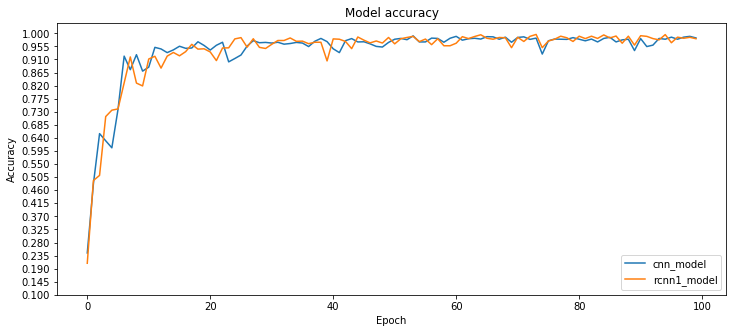

In [84]:
import matplotlib.pyplot as plt
plt.plot(cnn_model_history.history['val_acc'])
plt.plot(rcnn1_model_history.history['val_acc'])
plt.rcParams['figure.figsize'] = (12.0, 5.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['cnn_model', 'rcnn1_model'], loc='lower right')
plt.yticks(np.linspace(0.1, 1, 21))
plt.show()

inputs = Input(shape=(100,100,3))
x = Conv2D(8, kernel_size=(5, 5), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
r1 = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
r2 = Conv2D(16, kernel_size=(5, 5), activation='relu')(x)
r = Multiply()([r1,r2])
x = MaxPooling2D(pool_size=(2, 2))(r)
x = Conv2D(32, kernel_size=(5, 5), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(r)
x = Flatten()(x)
x = Dense(120, activation='relu')(x)
x = Dense(84, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
rnn2_model = Model(inputs=inputs,outputs = x)

In [15]:
rnn2_model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr=1e-3,momentum=0.9),#SGD(lr=1e-3,momentum=0.9)
              metrics=['accuracy'])

In [16]:
rnn2_model_history=rnn2_model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples// batch_size ,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples// batch_size,
        workers = 4)

Epoch 1/100
128/128 [==============================] - 13s 102ms/step - loss: 2.2513 - acc: 0.1675 - val_loss: 2.0984 - val_acc: 0.1493
Epoch 2/100
128/128 [==============================] - 12s 93ms/step - loss: 1.6932 - acc: 0.3281 - val_loss: 1.2762 - val_acc: 0.4841
Epoch 3/100
128/128 [==============================] - 13s 104ms/step - loss: 1.2471 - acc: 0.5117 - val_loss: 0.8395 - val_acc: 0.6674
Epoch 4/100
128/128 [==============================] - 16s 123ms/step - loss: 1.0518 - acc: 0.5928 - val_loss: 0.7448 - val_acc: 0.7217
Epoch 5/100
128/128 [==============================] - 16s 125ms/step - loss: 0.9859 - acc: 0.6216 - val_loss: 0.6288 - val_acc: 0.7903
Epoch 6/100
128/128 [==============================] - 16s 123ms/step - loss: 0.7865 - acc: 0.6987 - val_loss: 0.6929 - val_acc: 0.7508
Epoch 7/100
128/128 [==============================] - 16s 122ms/step - loss: 1.0112 - acc: 0.6368 - val_loss: 0.8281 - val_acc: 0.6685
Epoch 8/100
128/128 [============================

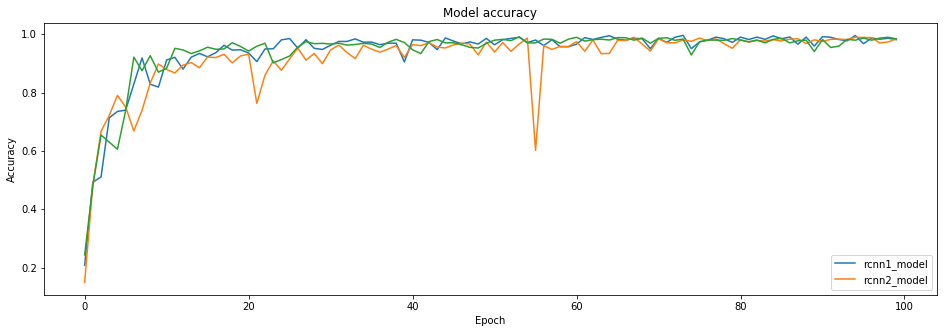

In [71]:
plt.plot(rcnn1_model_history.history['val_acc'])
plt.plot(rnn2_model_history.history['val_acc'])
plt.plot(cnn_model_history.history['val_acc'])
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['rcnn1_model', 'rcnn2_model'], loc='lower right')
plt.show()

In [86]:
len(cnn_model_history.history['val_acc'])

100

In [89]:
cnn_model_20=cnn_model_history.history['val_acc'][20:100]

In [92]:
rnn1_model_20=rcnn1_model_history.history['val_acc'][20:100]
rnn2_model_20=rnn2_model_history.history['val_acc'][20:100]

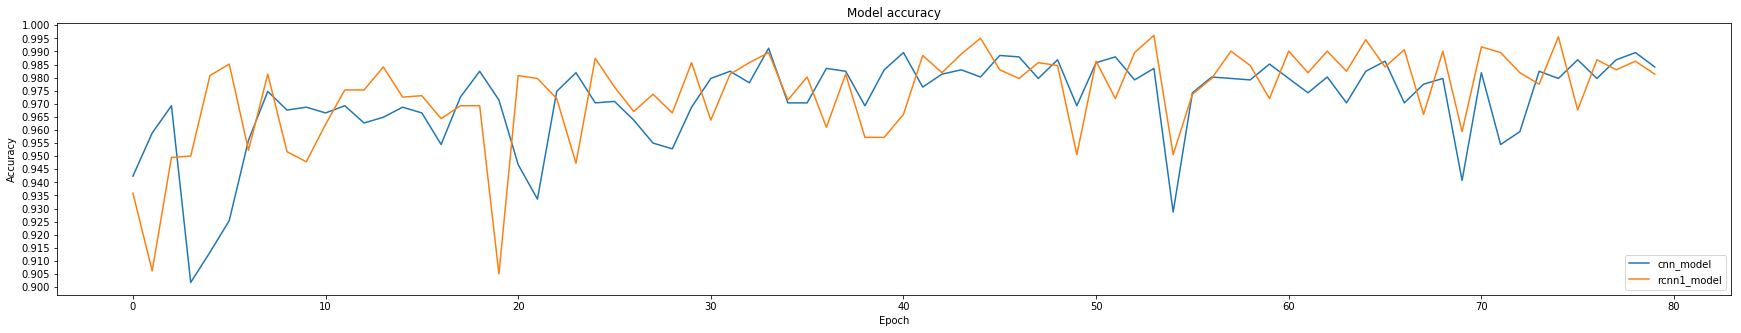

In [105]:
plt.plot(cnn_model_20)
plt.plot(rnn1_model_20)
plt.rcParams['figure.figsize'] = (30.0, 5.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['cnn_model', 'rcnn1_model'], loc='lower right')
plt.yticks(np.linspace(0.9, 1, 21))
plt.savefig('./mstar.jpg')
plt.show()